<a href="https://colab.research.google.com/github/priyanka36/MLProblems/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install kaggle
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 128MB/s]


## PROBLEM STATEMENT :TO PREDICT WHETHER IT WILL RAIN TOMORROW OR NOT(CLASSIFICATION PROBLEM) 
## ABOUT DATA :
- 10 years of daily weather observations from many locations across Australia.
- Target variable to predict is Rainfall.
- Will it rain the next day : Yes or No? 
- This column is Yes if the rain for that day was 1mm or more




### DATA DESCRIPTION :
- Date : The date of observation
- Location : The common name of the location of the weather station
- Min Temp : The minimum temperature in degrees celsius
- Max Temp : The maximum temperature in degrees celsius
- Rainfall : The amount of rainfall recorded for the day in mm
- Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine : The number of hours of bright sunshine in the day.
- WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am : Direction of the wind at 9am

Additional information on data: 

- These observations have been taken from the Bureau of Meteorology's "real time" system. 
- Most of the data were generated and handled
automatically. 
- Some quality checking was performed, but it is still possible for erroneous values to appear.
- From time to time, observations were not be available, for a variety of reasons. Sometimes when the daily maximum and minimum
temperatures, rainfall or evaporation are missing, the next value given has been accumulated over several days rather than the normal one
day

In [6]:
! unzip /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [7]:
# import necessary libraries 
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
 df = pd.read_csv("/content/weatherAUS.csv")
 df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# INFORMATION FROM DATA 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.shape

(145460, 23)

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Cleaning 
Data includes a lot of NaN value. Instead of usign them, I drop some NaN values. It does not only remove the uncertainty but it also ease visualization process.

- Replace NAN values with interpolation according to nature of data
- Replace NAN values with mean or mode according to nature of data
- Drop unused features

In [12]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# From the above data it is clear that for 
- Cloud3pm : Around 60K values are missing
- Shunshine : Around 70K values are missing
- Evaporation : Around 63K values are missing


We chose interpolation to fill the null values in Max and Min Temperature. The reason for chosing interpolation to fill the null value is:
- Because the temperature doesn't vary drastically between two consecutive days 
- Two days have almost similar type of weather condition

In [13]:
df['MinTemp'].interpolate(method="linear",inplace=True)
df['MaxTemp'].interpolate(method="linear",inplace=True)
df['MinTemp'].isna().sum()
df['MaxTemp'].isna().sum()

0

- The other observation values would be a complete non-relatable data on even alternate days
- So replacing the data with null values would be the best option

In [14]:
df.fillna(df.mean(),inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [15]:
#Check if any existing null values
df.isna().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

 # The categorical variables still contains null values 
 We replace these values with the most repeated values ie. mode
 


In [16]:
df.fillna(df.mode(),inplace=True)
#Check if any existing null values
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
df_max = df["WindGustDir"].value_counts().max()

df["WindGustDir"].fillna("W",inplace=True)
df_max = df["RainToday"].value_counts().max()

df["RainToday"].fillna("No",inplace=True)
df_max = df["RainTomorrow"].value_counts().max()

df["RainTomorrow"].fillna("No",inplace=True)
df_max = df["WindDir9am"].value_counts().max()

df["WindDir9am"].fillna("N",inplace=True)
df_max = df["WindDir3pm"].value_counts().max()

df["WindDir3pm"].fillna("SE",inplace=True)




In [18]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### The categorical data need to be converted for further analysis

In [19]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    df[c1]= label_encoder.fit_transform(df[c1].astype(str))
 
    df[c1].unique()
    return df

In [20]:
LABEL_ENCODING('Location')
LABEL_ENCODING('WindGustDir')
LABEL_ENCODING('WindDir9am')
LABEL_ENCODING('WindSpeed3pm')
LABEL_ENCODING('RainToday')
LABEL_ENCODING('RainTomorrow')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.00000,13,WNW,20.0,10,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.00000,6,WSW,4.0,9,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.00000,13,WSW,19.0,11,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.00000,9,E,11.0,44,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.00000,1,NW,7.0,8,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,5.468232,7.611178,0,31.00000,9,ENE,13.0,1,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,2017-06-22,41,3.6,25.3,0.0,5.468232,7.611178,6,22.00000,9,N,13.0,44,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,2017-06-23,41,5.4,26.9,0.0,5.468232,7.611178,3,37.00000,9,WNW,9.0,44,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,2017-06-24,41,7.8,27.0,0.0,5.468232,7.611178,9,28.00000,10,N,13.0,37,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


## EXPLORATORY DATA ANALYSIS 

In [21]:
columns = df.columns
print(columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [22]:
px.scatter(df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

### From the above observation it is seen that
- The higher temperature with less humidity have a little chance for rain
- But average temperature with more humidity have more probability for rain
- Humidity is directly proportional to probability of rain
- Atmospheric Humidity is an important factor for rain




In [23]:
px.scatter(df.sample(8000), 
           title='Mintemprature vs. Rainfall',
           x='MinTemp',
           y='Rainfall',
           color='RainTomorrow')

## From the above observation it is clear that:
- Low temperature doesn't necessarily induce rainfall
- Temperature around 5-20 is most likely inducing rainfall


In [24]:
px.histogram(df , x = 'Location' , title ='Location vs. Rainy Days' ,color ='RainToday')

# The above bar graph shows that :
- Nhil and Uluru have very low probability of rain almost everyday 
- Portland has a high probability of rain as represented in graph.
- Location is definitely a factor in deciding whether it will rain tomorrow or not.

In [25]:
px.scatter(df.sample(2000), 
           title='Evaporation. vs Rainfall.',
           x='Evaporation', 
           y='Rainfall', 
           color='RainTomorrow')

- The above plot shows evaporation doesn't give a clear idea for rainfall
- There is less evaporation during rainfall

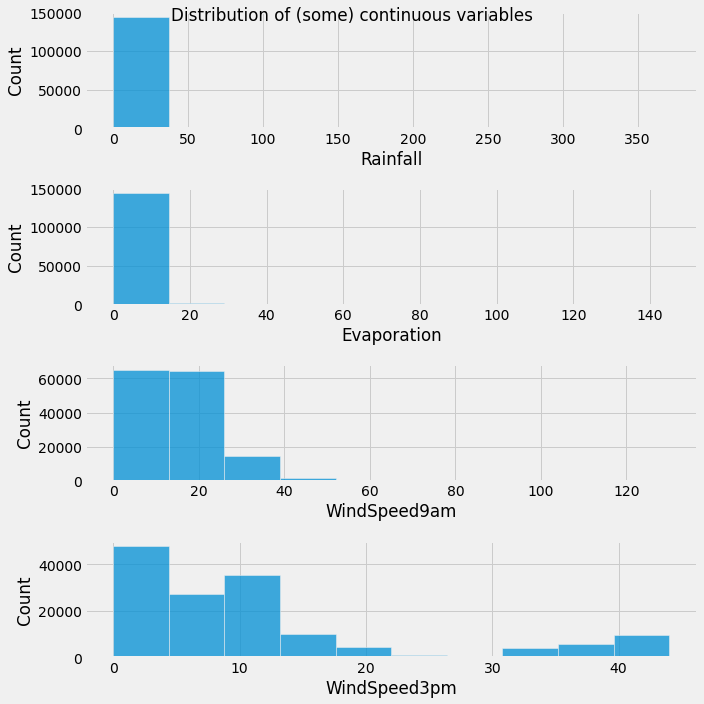

In [26]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')
# Rainfall
sns.histplot(x= 'Rainfall', data = df, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")

# Evaporation
sns.histplot(x= 'Evaporation', data = df, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")

# Windspeed (9AM)
sns.histplot(x= 'WindSpeed9am', data = df, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")

# Windspeed (3PM)
sns.histplot(x= 'WindSpeed3pm', data = df, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")

plt.tight_layout()

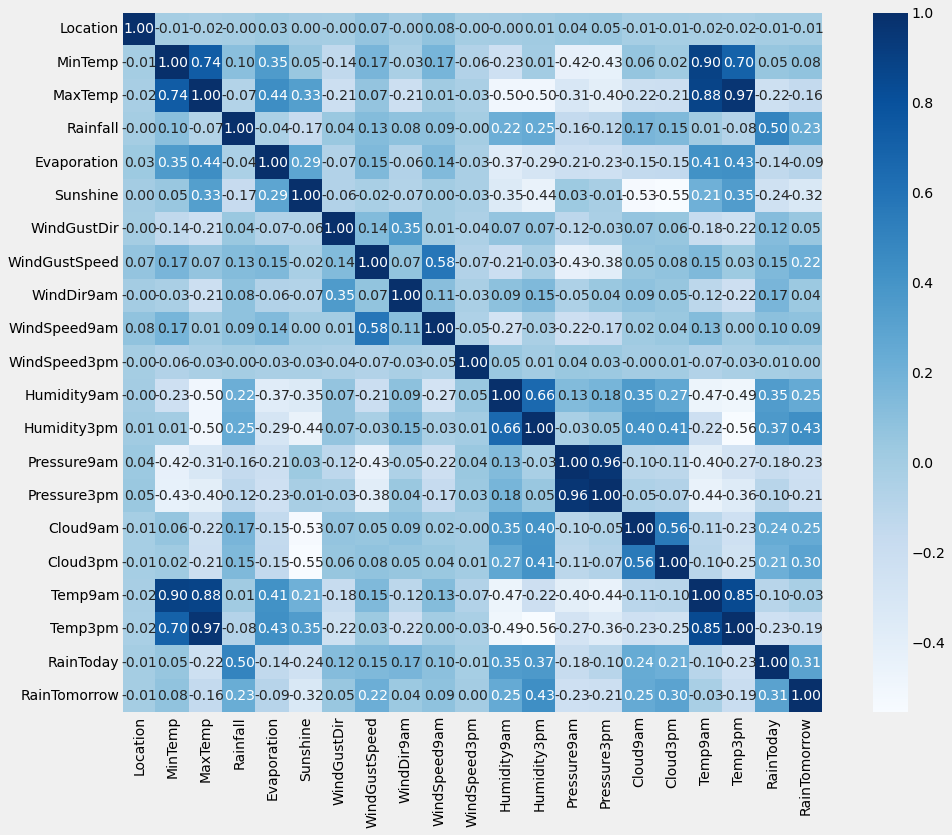

In [27]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), 
            square=True, 
            cmap='Blues', 
            annot=True, 
            fmt='.2f', 
            linecolor='white');

From the above figure it is clear that 
- Min temperature is strongly related to Max temperature 
- Temp at 9 am and 3 pm are strongly related with Max and Min Temperature
- Only Max/Min feature could be considred and Temp at 3 pm or 9 am could be considered

In [28]:
df = df.drop(["MinTemp","Temp9am",],axis=1)

In [29]:
df = df.drop(["WindDir3pm",],axis=1)

In [30]:
df = df.drop(["Date"],axis=1)

In [31]:
df

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,2,22.9,0.6,5.468232,7.611178,13,44.00000,13,20.0,10,71.0,22.0,1007.7,1007.1,8.000000,4.50993,21.8,0,0
1,2,25.1,0.0,5.468232,7.611178,14,44.00000,6,4.0,9,44.0,25.0,1010.6,1007.8,4.447461,4.50993,24.3,0,0
2,2,25.7,0.0,5.468232,7.611178,15,46.00000,13,19.0,11,38.0,30.0,1007.6,1008.7,4.447461,2.00000,23.2,0,0
3,2,28.0,0.0,5.468232,7.611178,4,24.00000,9,11.0,44,45.0,16.0,1017.6,1012.8,4.447461,4.50993,26.5,0,0
4,2,32.3,1.0,5.468232,7.611178,13,41.00000,1,7.0,8,82.0,33.0,1010.8,1006.0,7.000000,8.00000,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,23.4,0.0,5.468232,7.611178,0,31.00000,9,13.0,1,51.0,24.0,1024.6,1020.3,4.447461,4.50993,22.4,0,0
145456,41,25.3,0.0,5.468232,7.611178,6,22.00000,9,13.0,44,56.0,21.0,1023.5,1019.1,4.447461,4.50993,24.5,0,0
145457,41,26.9,0.0,5.468232,7.611178,3,37.00000,9,9.0,44,53.0,24.0,1021.0,1016.8,4.447461,4.50993,26.1,0,0
145458,41,27.0,0.0,5.468232,7.611178,9,28.00000,10,13.0,37,51.0,24.0,1019.4,1016.5,3.000000,2.00000,26.0,0,0


## Classification And Modelling

# K nearest Neighbour Classifier

In [32]:
label=df['RainTomorrow']
X_train,X_test,y_train,y_test=train_test_split((df),label,test_size=0.25)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(109095, 19) (109095,)
(36365, 19) (36365,)


In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90     28388
           1       0.69      0.50      0.58      7977

    accuracy                           0.84     36365
   macro avg       0.78      0.72      0.74     36365
weighted avg       0.83      0.84      0.83     36365



## Classifier Evaluation

In [34]:
cmat = confusion_matrix(y_test,pred)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 26575
FP - False Positive 1813
FN - False Negative 3974
TP - True Positive 4003
Accuracy Rate: 0.8408634676199642
Misclassification Rate: 0.15913653238003575


In [35]:
from typing import List
class Solution:
  def twoSum(self, nums: List[int], target: int) -> List[int]:
    nums_dict = {}
    for index,number in enumerate(nums):
      nums_dict[index]=number
      solution_index = []
    print(nums_dict)
    for index,number in nums_dict.items():
      for index2,number2 in nums_dict.items():
        if number + number2 == target and index != index2 :
          solution_index.append(index)
          solution_index.append(index2)
          return solution_index

In [36]:
sol = Solution()

In [37]:
res = sol.twoSum([3,2,4],6)

{0: 3, 1: 2, 2: 4}


In [38]:
res

[1, 2]

In [39]:
from typing import List
class Solution:
  def twoSum(self, nums: List[int], target: int) -> List[int]:
    nums_dict = {}
    for index,number in enumerate(nums):
      nums_dict[index]=number
    solution_index = []
    print(nums_dict)
    for index,number in nums_dict.items():
      check = target - number
      if check in nums_dict.values():
        solution_index.append(index)
        solution_index.append(key for key, value in nums_dict.items() if value == check)
        return solution_index